In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image


In [42]:
img_di="/kaggle/input/brain-mri-images-for-brain-tumor-detection"

In [43]:
yes_values=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes')
no_values=os.listdir('/kaggle/input/brain-mri-images-for-brain-tumor-detection/no')

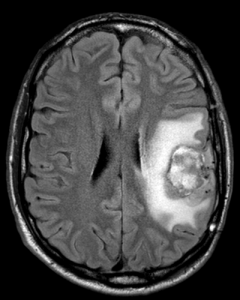

In [44]:
im =Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes/Y92.png')
im

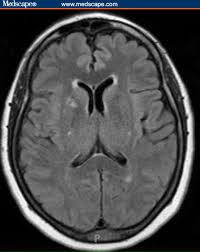

In [45]:
im =Image.open('/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/no/31 no.jpg')
im

# **Data Preprocessing**

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the path to the dataset
dataset_dir = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'

# Image Data Generator for training, validation, and testing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Splitting 20% for validation

# Training set
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=['no', 'yes'],  # Specify 'no' and 'yes' classes only
    subset='training'  # Using 80% for training
)

# Validation set
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    classes=['no', 'yes'],  # Specify 'no' and 'yes' classes only
    subset='validation'  # Using 20% for validation
)
X_train, y_train = next(train_generator)
X_test,y_test=next(val_generator)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# **CNN**

In [47]:
from tensorflow.keras import layers, models

# Define a custom CNN model for input shape (150, 150, 3)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 0.7005 - val_accuracy: 0.6250 - val_loss: 0.6716
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5625 - loss: 0.7062 - val_accuracy: 0.7188 - val_loss: 0.6420
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5938 - loss: 0.6123 - val_accuracy: 0.7188 - val_loss: 0.5716
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8750 - loss: 0.5352 - val_accuracy: 0.7812 - val_loss: 0.5130
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8438 - loss: 0.4575 - val_accuracy: 0.7812 - val_loss: 0.5053
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.8438 - loss: 0.3932 - val_accuracy: 0.8125 - val_loss: 0.5589
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8438 - loss: 0.3362 - val_accuracy: 0.7812 - val_loss: 0.6928
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8750 - loss: 0.3282 - val_accuracy: 0.7812 - val_loss: 0.7924
Epoch 

In [48]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')


1/1 - 0s - 25ms/step - accuracy: 0.7812 - loss: 3.8223
Test accuracy: 0.78


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


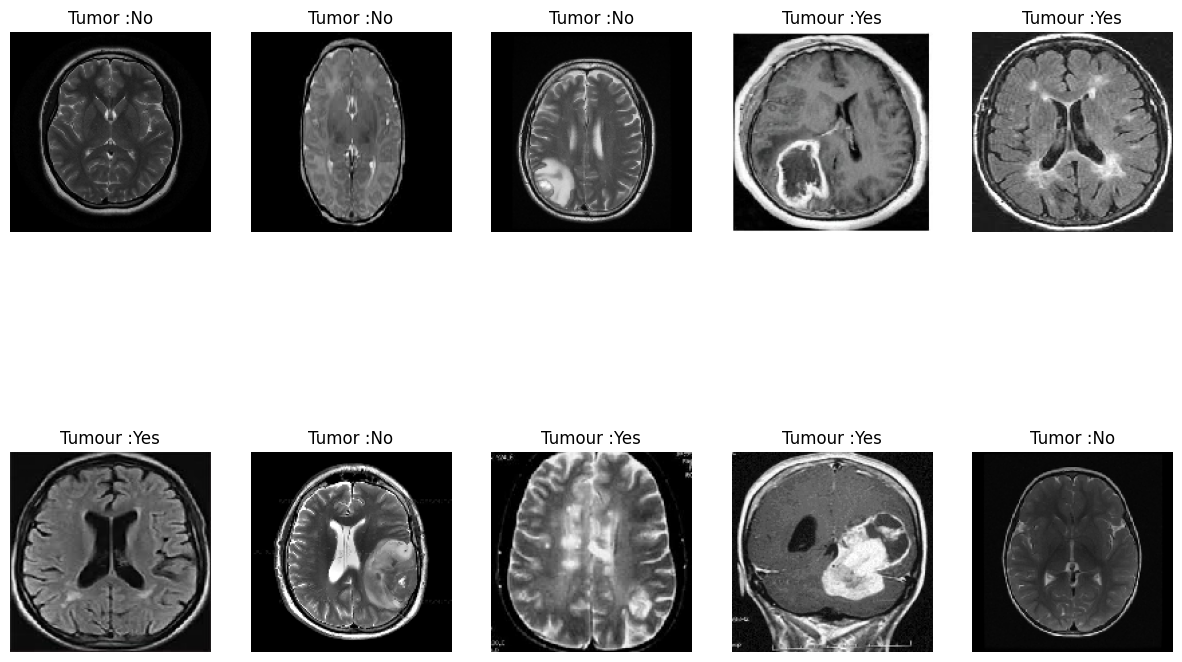

In [49]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


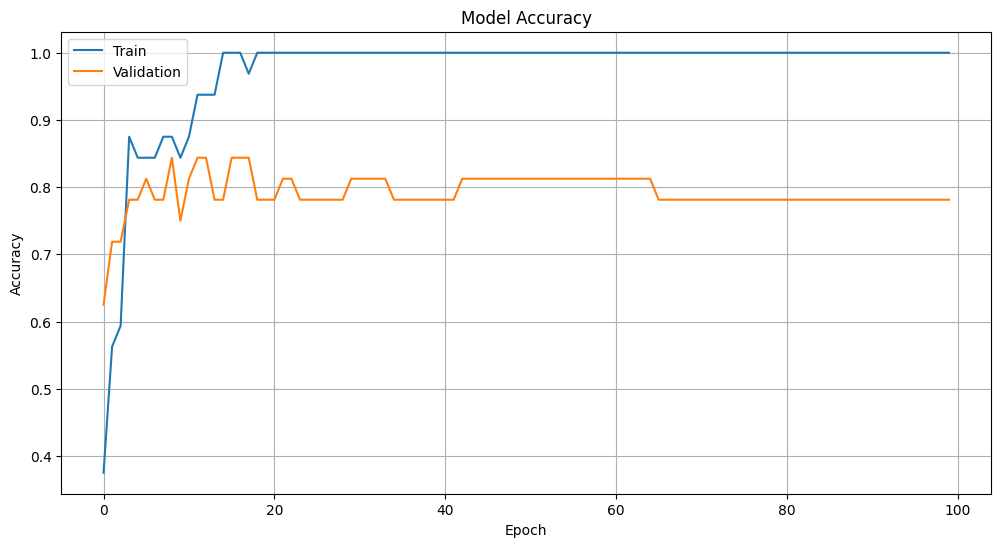

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


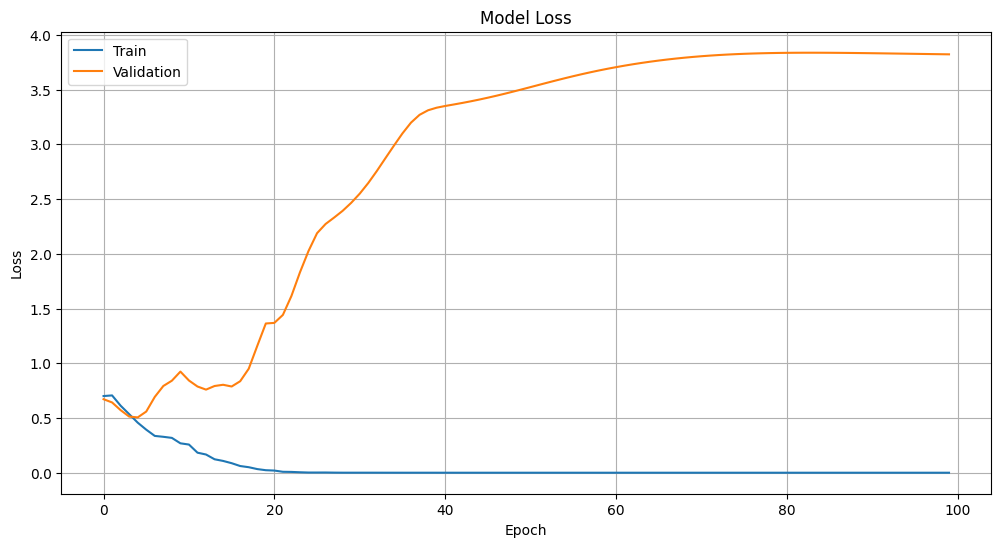

In [51]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


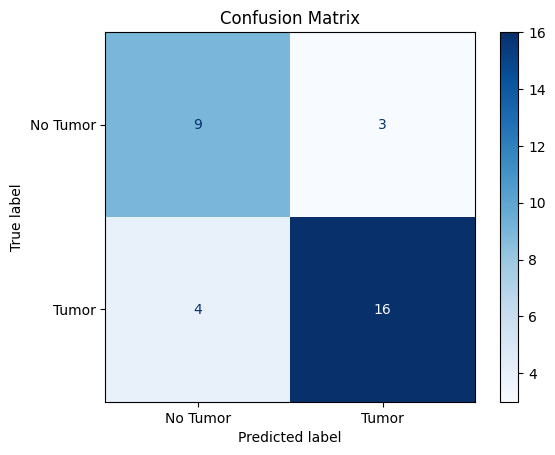

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# **InceptionV3**

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import os


In [54]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load the InceptionV3 model with pre-trained ImageNet weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Create a new model on top of the base model
model = models.Sequential([
    base_model,  # Add the InceptionV3 base model
    layers.GlobalAveragePooling2D(),  # Reduce dimensions
    layers.Dense(64, activation='relu'),  # Dense layer similar to the original model
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.3438 - loss: 0.9991 - val_accuracy: 0.6250 - val_loss: 1.8012
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5625 - loss: 1.8720 - val_accuracy: 0.6250 - val_loss: 0.5506
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8438 - loss: 0.3643 - val_accuracy: 0.4375 - val_loss: 1.3287
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.4688 - loss: 1.0049 - val_accuracy: 0.6875 - val_loss: 0.6456
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8750 - loss: 0.3301 - val_accuracy: 0.7500 - val_loss: 0.4965
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8438 - loss: 0.2612 - val_accuracy: 0.6250 - val_loss: 0.6862
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7500 - loss: 0.4087 - val_accuracy: 0.7188 - val_loss: 0.5880
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8125 - loss: 0.2810 - val_accuracy: 0.7812 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


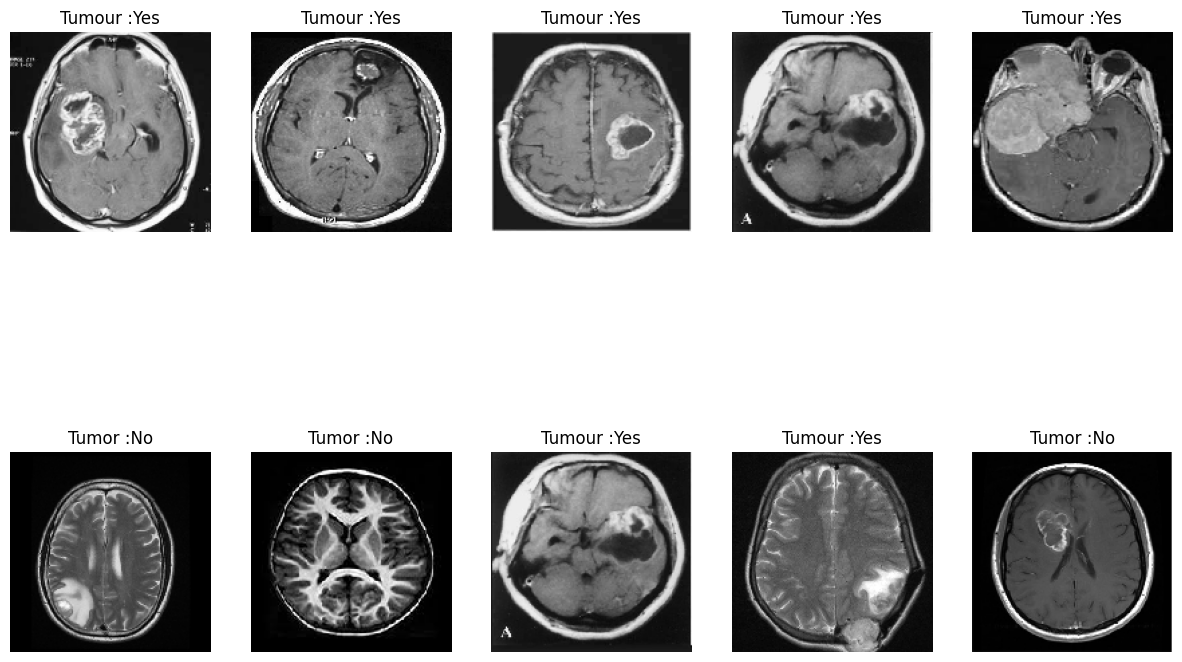

In [56]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


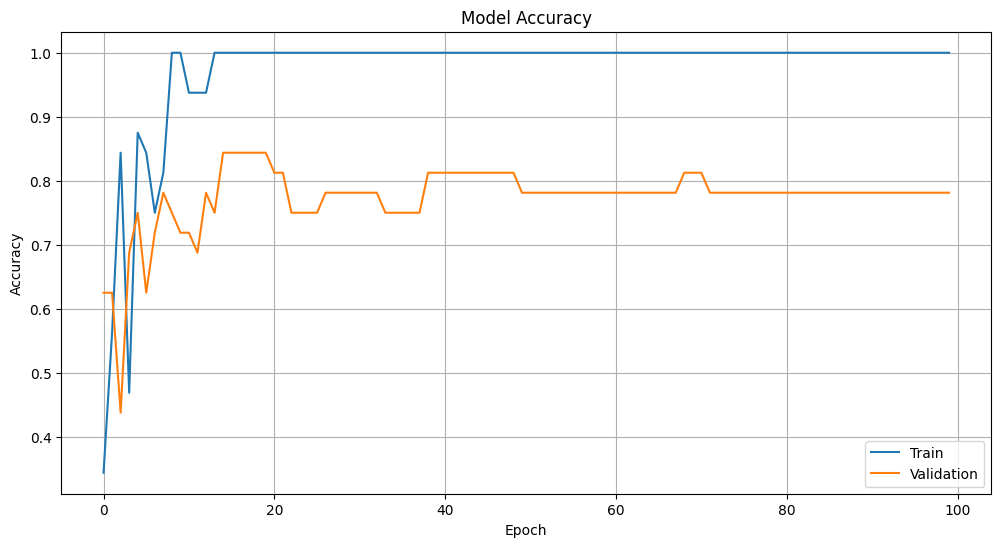

In [57]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


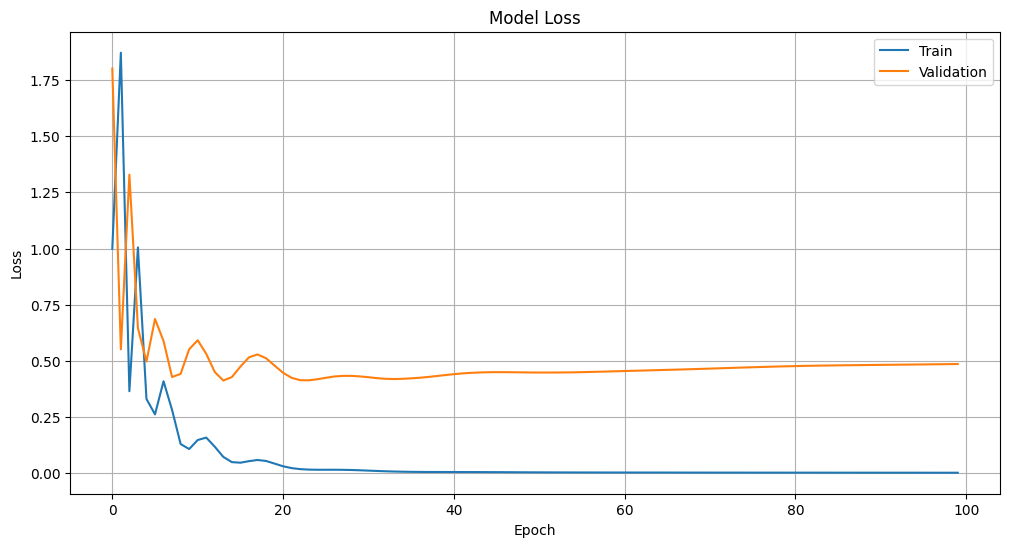

In [58]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


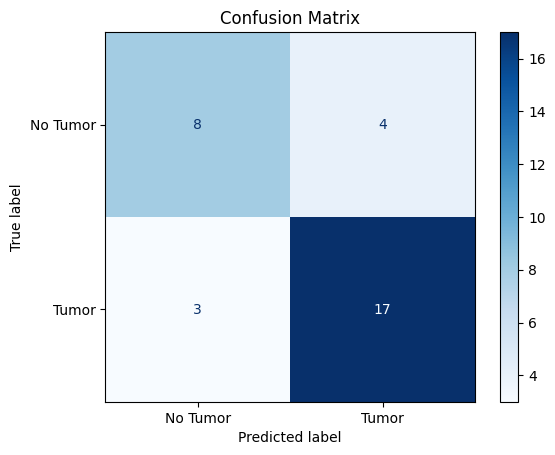

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


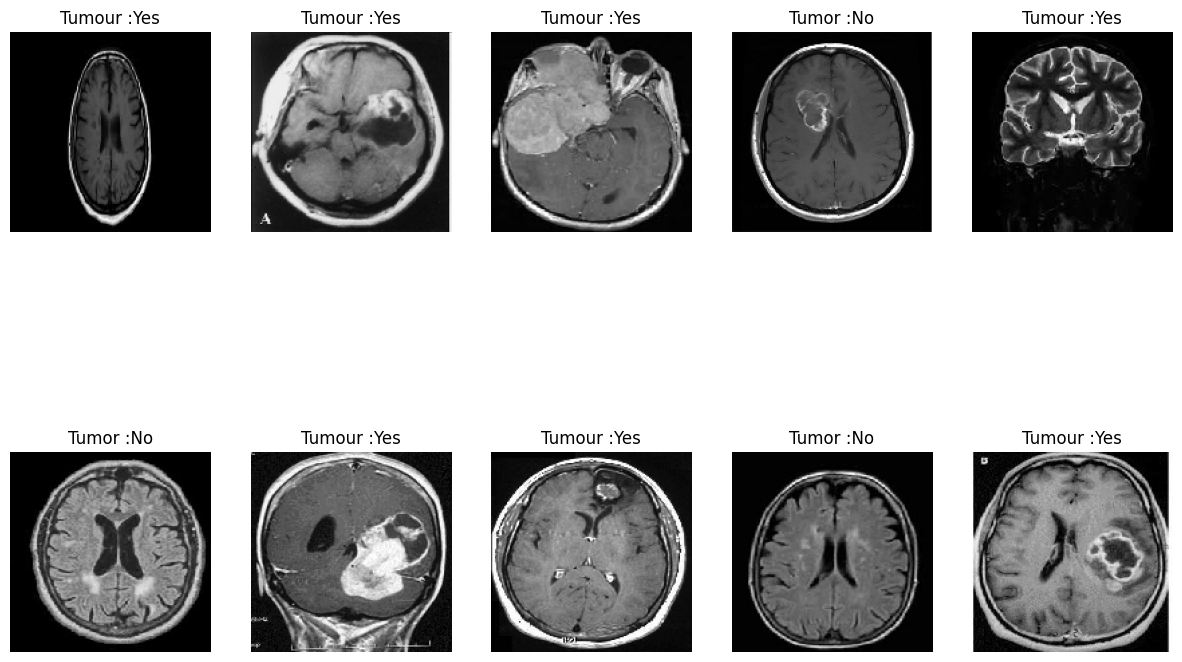

In [60]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


# **DenseNet121**

In [61]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models

# Load the DenseNet121 model with pre-trained ImageNet weights, excluding the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Create a new model on top of the base model
model = models.Sequential([
    base_model,  # Add the DenseNet121 base model
    layers.GlobalAveragePooling2D(),  # Reduce dimensions
    layers.Dense(64, activation='relu'),  # Dense layer similar to the original model
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [62]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.5938 - loss: 0.8057 - val_accuracy: 0.6875 - val_loss: 0.7078
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.6562 - loss: 0.6290 - val_accuracy: 0.7188 - val_loss: 0.5610
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8125 - loss: 0.4166 - val_accuracy: 0.7500 - val_loss: 0.5598
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9375 - loss: 0.3387 - val_accuracy: 0.7500 - val_loss: 0.5626
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9688 - loss: 0.2957 - val_accuracy: 0.7812 - val_loss: 0.4790
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.9375 - loss: 0.2264 - val_accuracy: 0.8125 - val_loss: 0.4087
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9688 - loss: 0.1954 - val_accuracy: 0.7812 - val_loss: 0.3797
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.9688 - loss: 0.1840 - val_accuracy: 0.7812 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


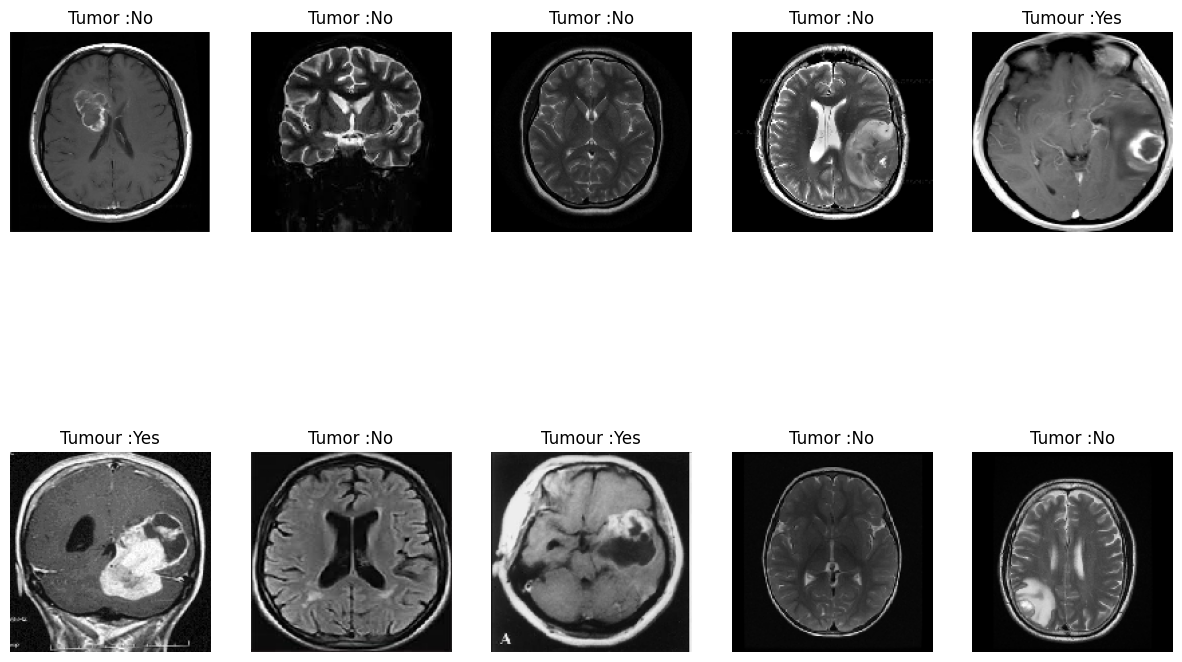

In [63]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


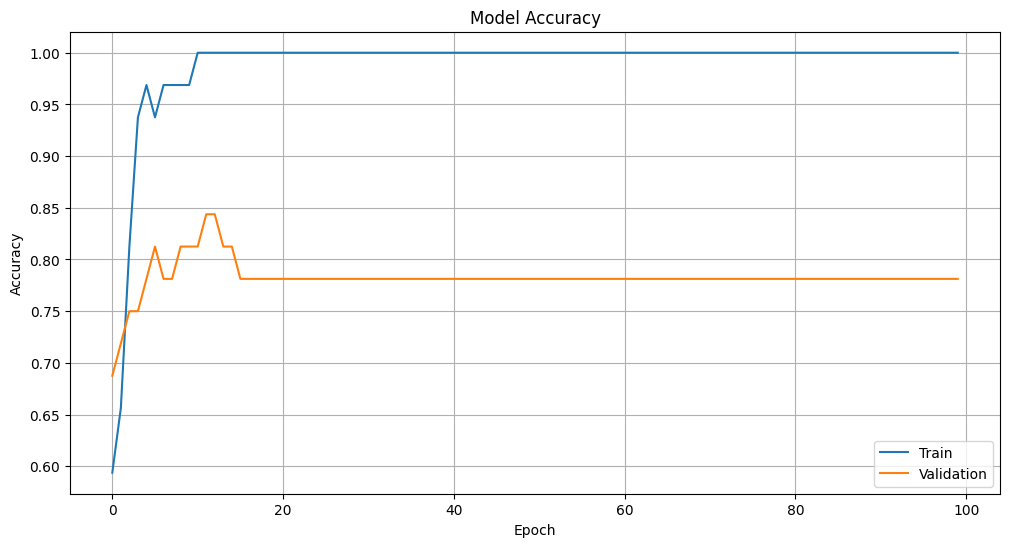

In [64]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


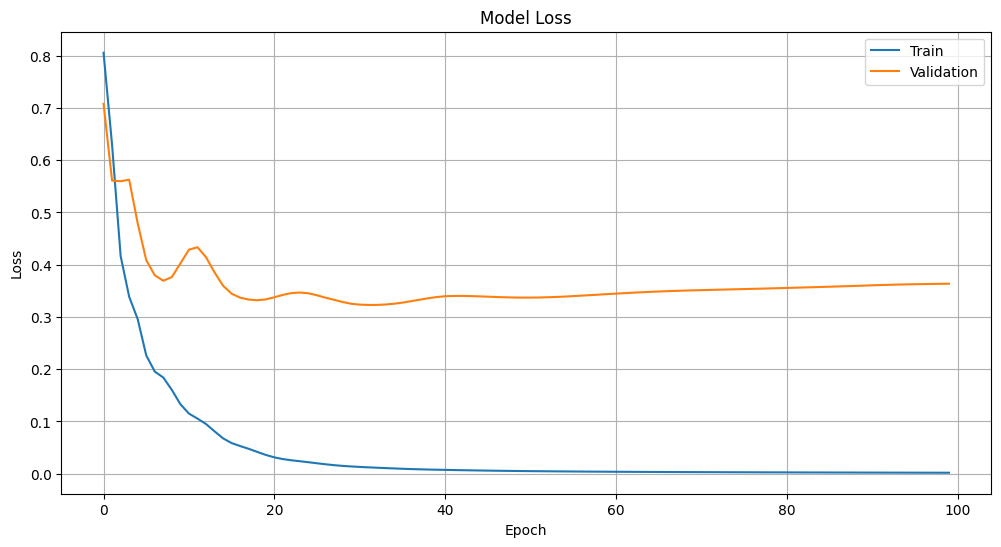

In [65]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


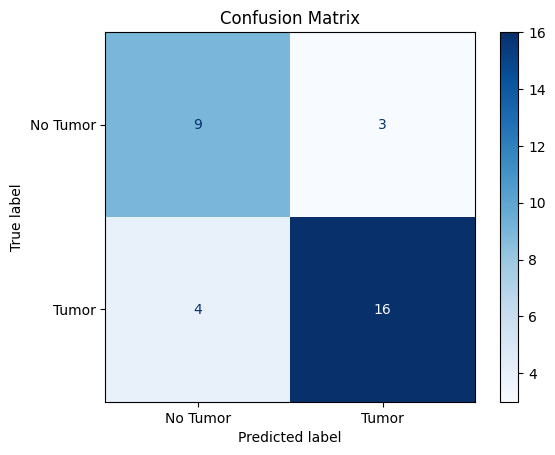

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# **ResNet50**

In [67]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the ResNet50 model with pre-trained ImageNet weights, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Create a new model on top of the base model
model = models.Sequential([
    base_model,  # Add the ResNet50 base model
    layers.GlobalAveragePooling2D(),  # Reduce dimensions
    layers.Dense(64, activation='relu'),  # Dense layer similar to the original model
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [68]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4375 - loss: 0.7666 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5625 - loss: 0.6833 - val_accuracy: 0.6250 - val_loss: 0.6465
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5625 - loss: 0.6706 - val_accuracy: 0.6250 - val_loss: 0.6433
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.5625 - loss: 0.6821 - val_accuracy: 0.6250 - val_loss: 0.6395
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5625 - loss: 0.6809 - val_accuracy: 0.6250 - val_loss: 0.6302
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5625 - loss: 0.6668 - val_accuracy: 0.6250 - val_loss: 0.6212
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5625 - loss: 0.6499 - val_accuracy: 0.6250 - val_loss: 0.6177
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5625 - loss: 0.6371 - val_accuracy: 0.7188 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


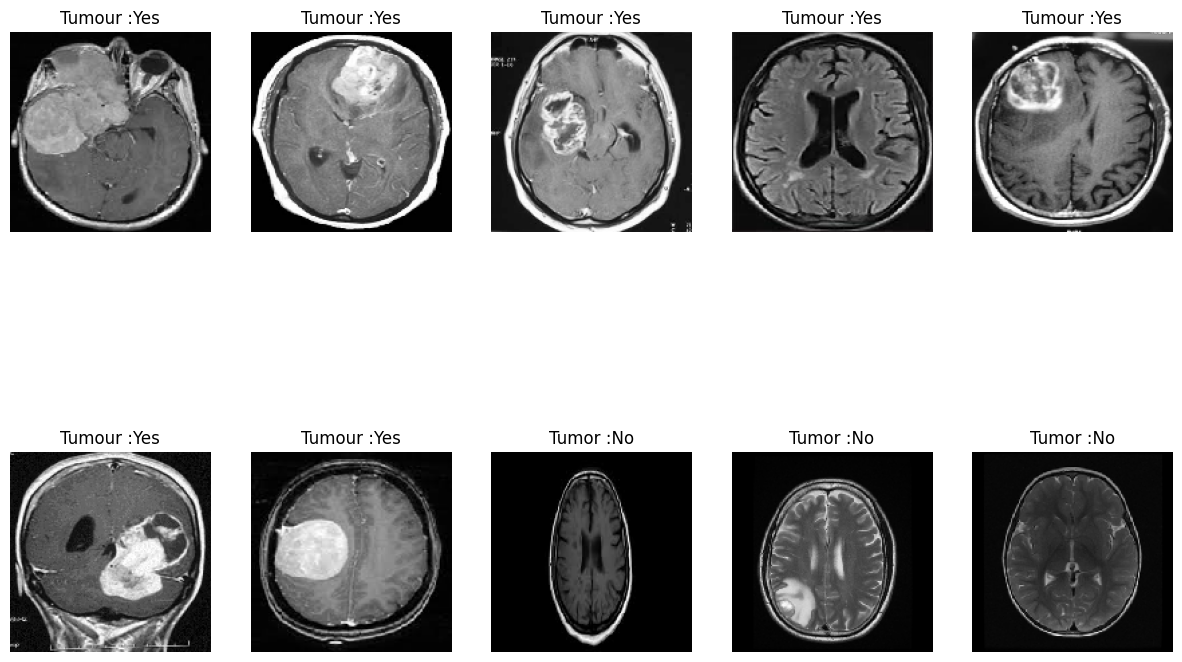

In [69]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


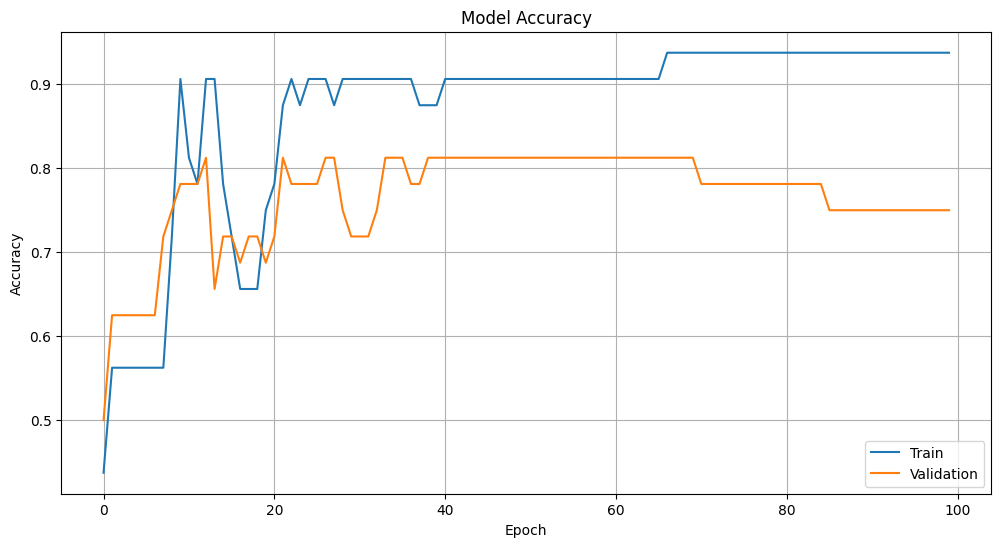

In [70]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


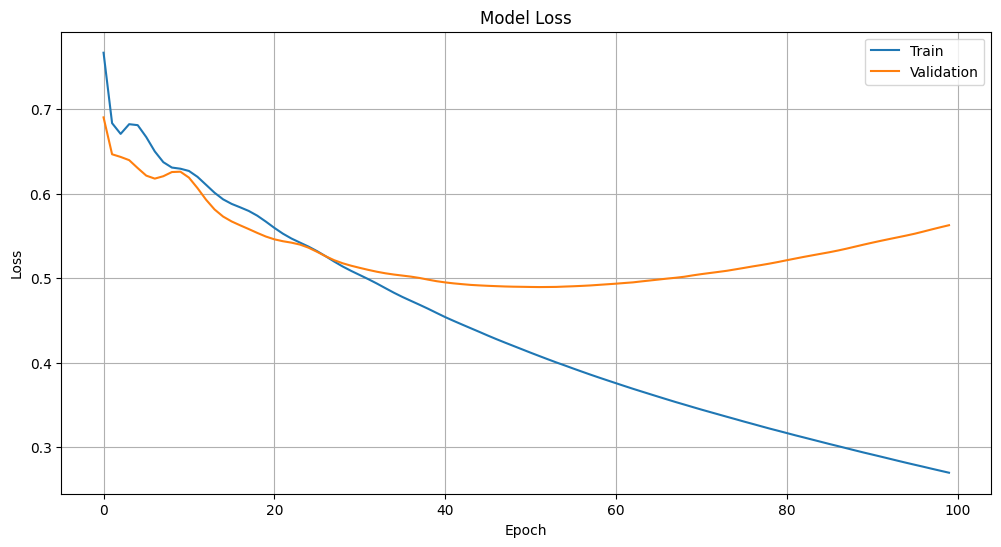

In [71]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


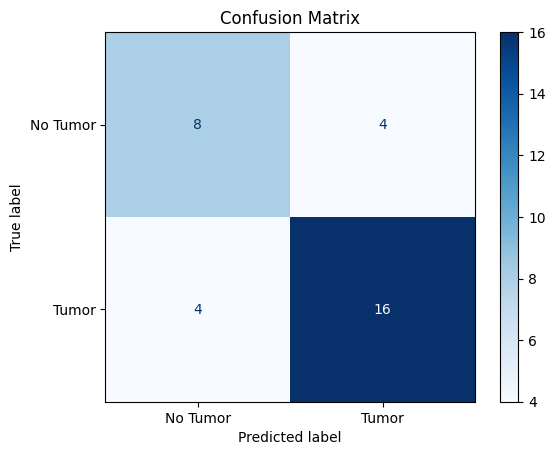

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# **VGG16**

In [73]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model with pre-trained ImageNet weights, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model's layers
base_model.trainable = False

# Create a new model on top of the base model
model = models.Sequential([
    base_model,  # Add the VGG16 base model
    layers.Flatten(),  # Flatten the output
    layers.Dense(64, activation='relu'),  # Dense layer similar to the original model
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [74]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 0.7303 - val_accuracy: 0.4062 - val_loss: 0.8026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.4688 - loss: 0.7192 - val_accuracy: 0.6250 - val_loss: 0.6010
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.5625 - loss: 0.5813 - val_accuracy: 0.7812 - val_loss: 0.5125
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7812 - loss: 0.4324 - val_accuracy: 0.8125 - val_loss: 0.4354
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9688 - loss: 0.2957 - val_accuracy: 0.7188 - val_loss: 0.4748
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.9375 - loss: 0.2790 - val_accuracy: 0.8125 - val_loss: 0.4107
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9688 - loss: 0.2029 - val_accuracy: 0.8438 - val_loss: 0.3922
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9688 - loss: 0.1767 - val_accuracy: 0.8438 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


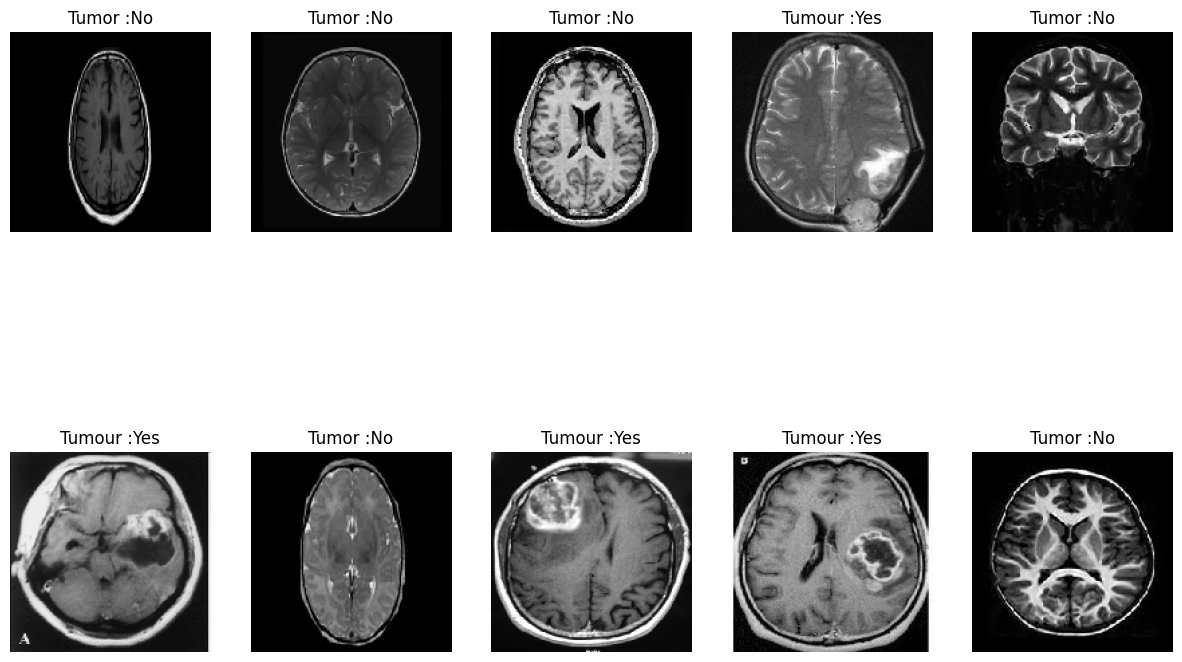

In [75]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


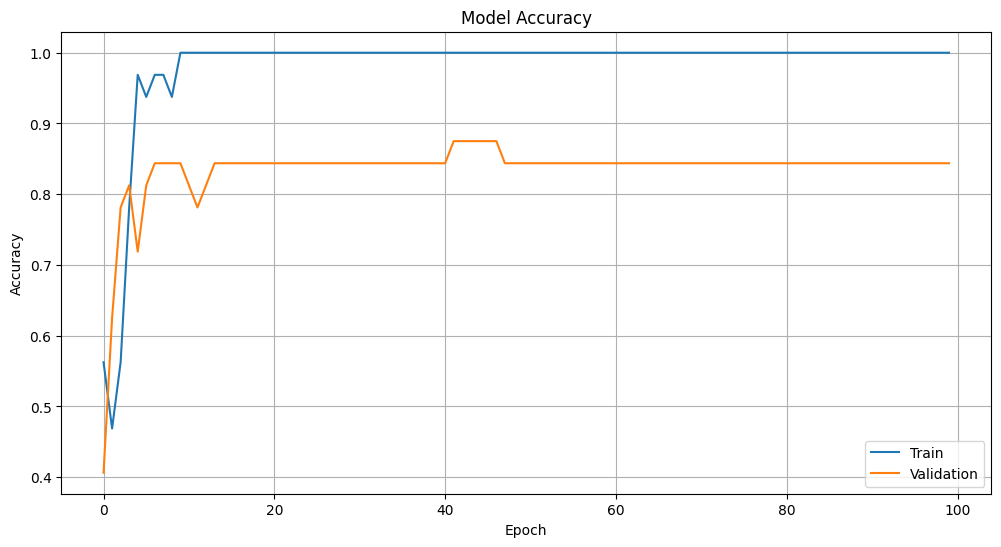

In [76]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


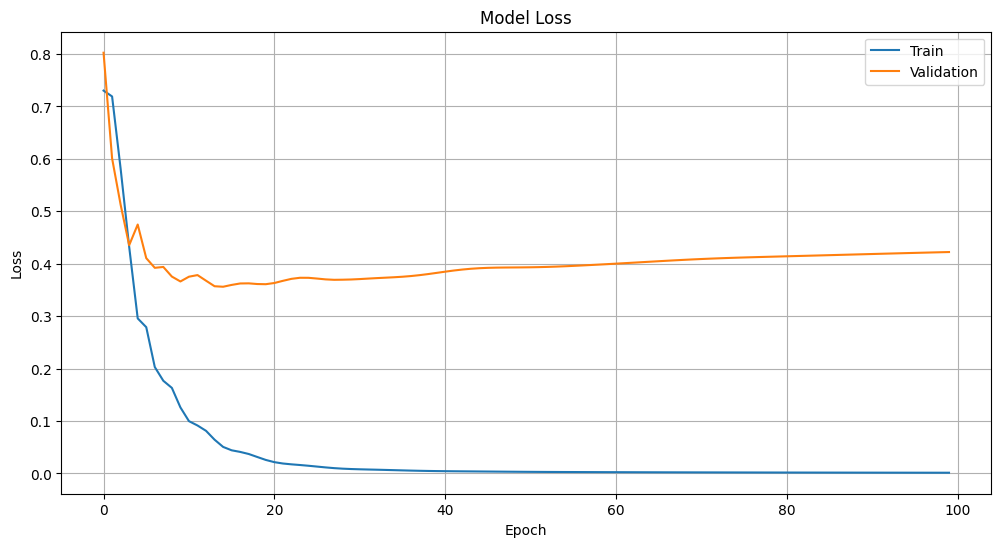

In [77]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


# **InceptionV3 Optimized**

In [78]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models,regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Load InceptionV3 model with pre-trained weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5312 - loss: 2.6310 - val_accuracy: 0.3750 - val_loss: 3.6176
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.4688 - loss: 3.6506 - val_accuracy: 0.3750 - val_loss: 2.8022
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.4062 - loss: 2.9007 - val_accuracy: 0.5312 - val_loss: 1.9301
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.6562 - loss: 1.8445 - val_accuracy: 0.6250 - val_loss: 1.8917
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.6250 - loss: 1.8842 - val_accuracy: 0.6250 - val_loss: 2.0378
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5000 - loss: 2.4519 - val_accuracy: 0.6250 - val_loss: 1.9772
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6562 - loss: 2.1206 - val_accuracy: 0.6250 - val_loss: 1.8023
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.6250 - loss: 1.9043 - val_accuracy: 0.6875 - val_loss: 1.70

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


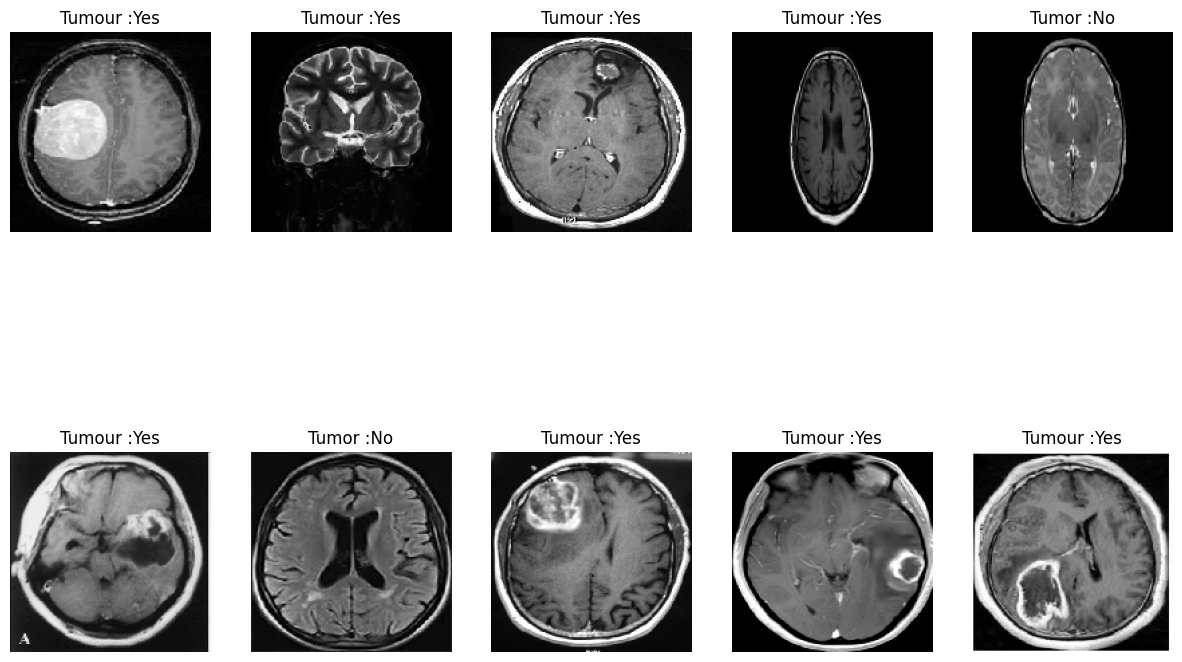

In [79]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


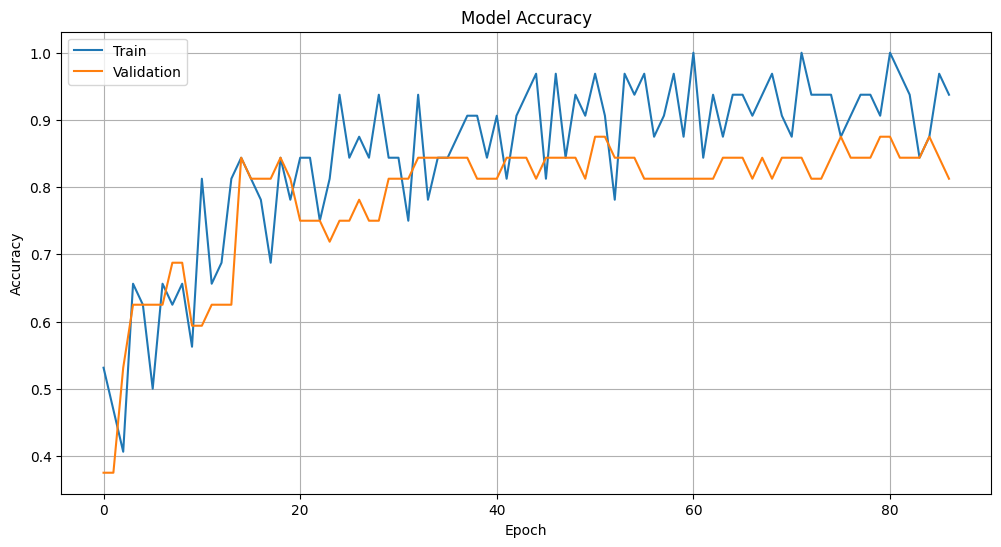

In [80]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


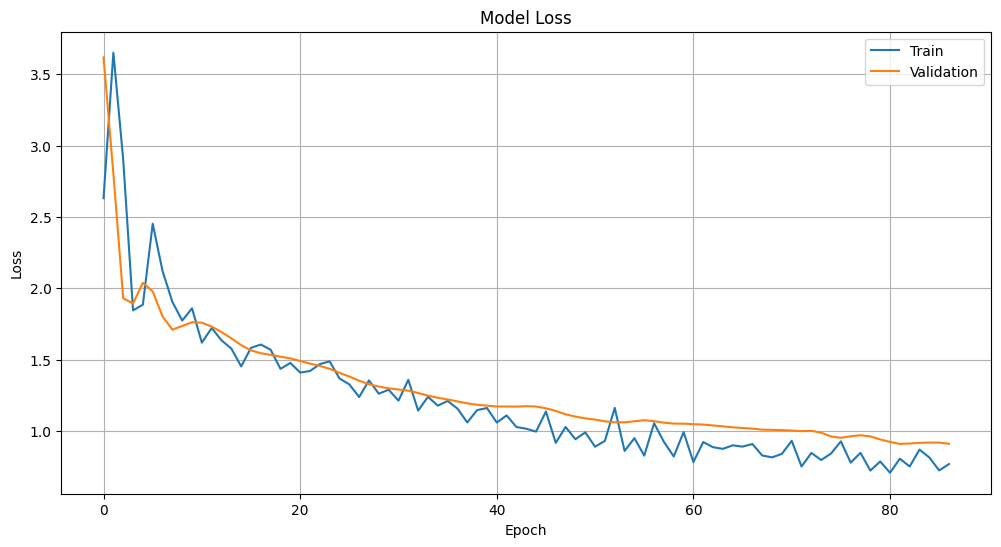

In [81]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


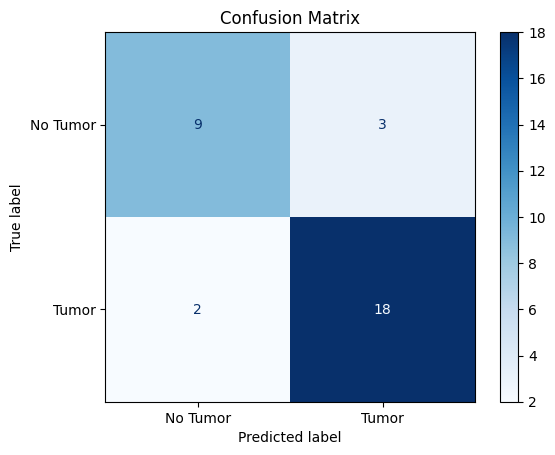

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# **Xception**

In [83]:
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Load Xception model with pre-trained weights, excluding the top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6562 - loss: 1.9443 - val_accuracy: 0.6250 - val_loss: 1.8368
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6875 - loss: 1.8754 - val_accuracy: 0.6875 - val_loss: 1.7459
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.5938 - loss: 1.7929 - val_accuracy: 0.7500 - val_loss: 1.7162
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7188 - loss: 1.6435 - val_accuracy: 0.7812 - val_loss: 1.6765
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8125 - loss: 1.5600 - val_accuracy: 0.8125 - val_loss: 1.6110
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9062 - loss: 1.4585 - val_accuracy: 0.8125 - val_loss: 1.5539
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8750 - loss: 1.4322 - val_accuracy: 0.8125 - val_loss: 1.5047
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8438 - loss: 1.3767 - val_accuracy: 0.8125 - val_loss: 1.49

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


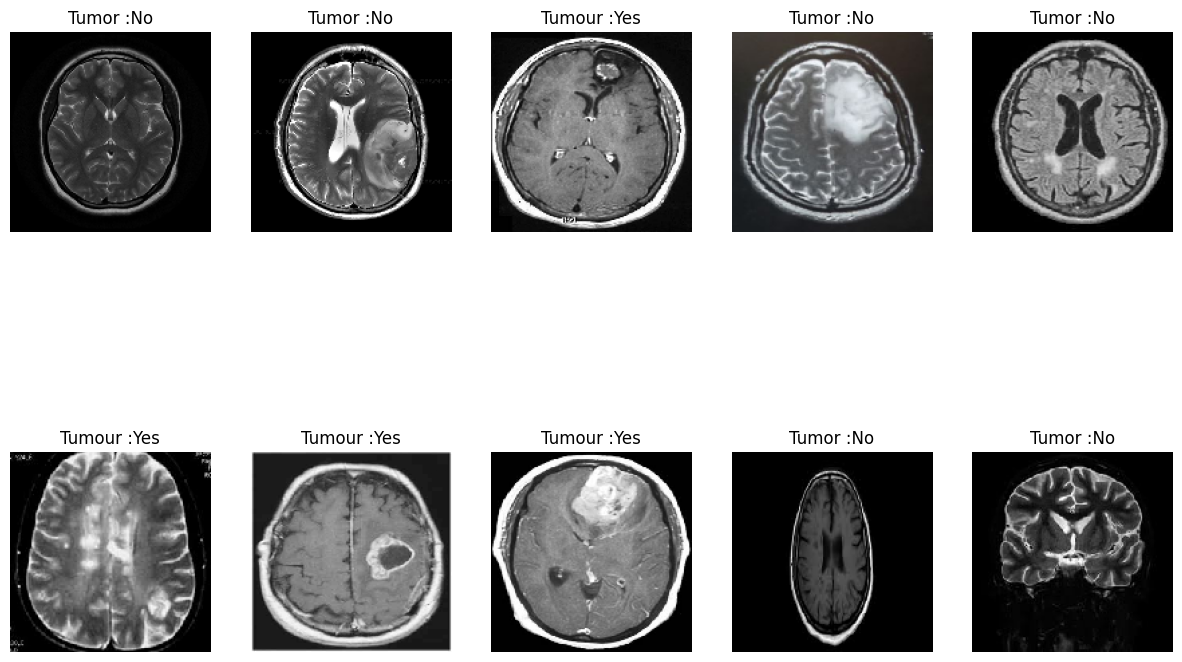

In [84]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


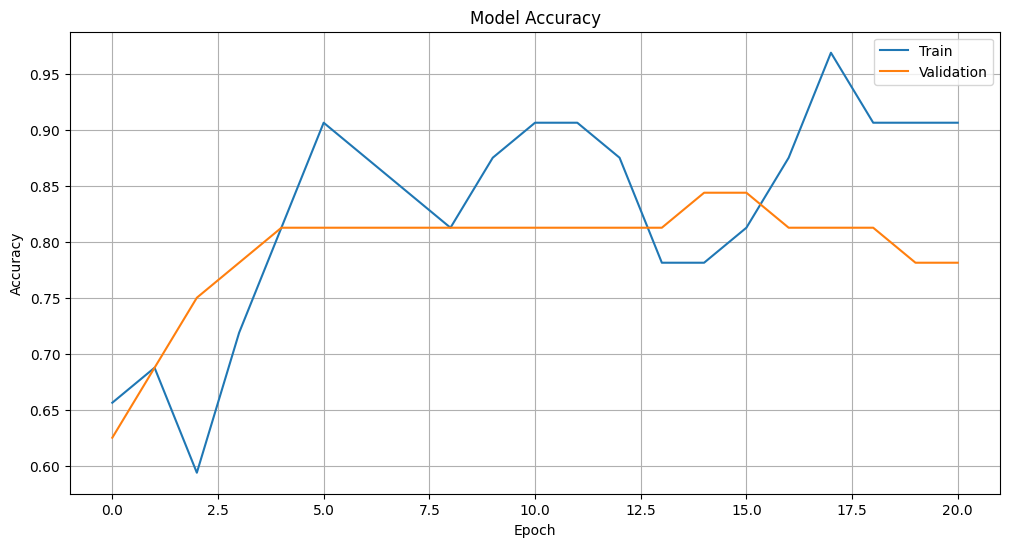

In [85]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


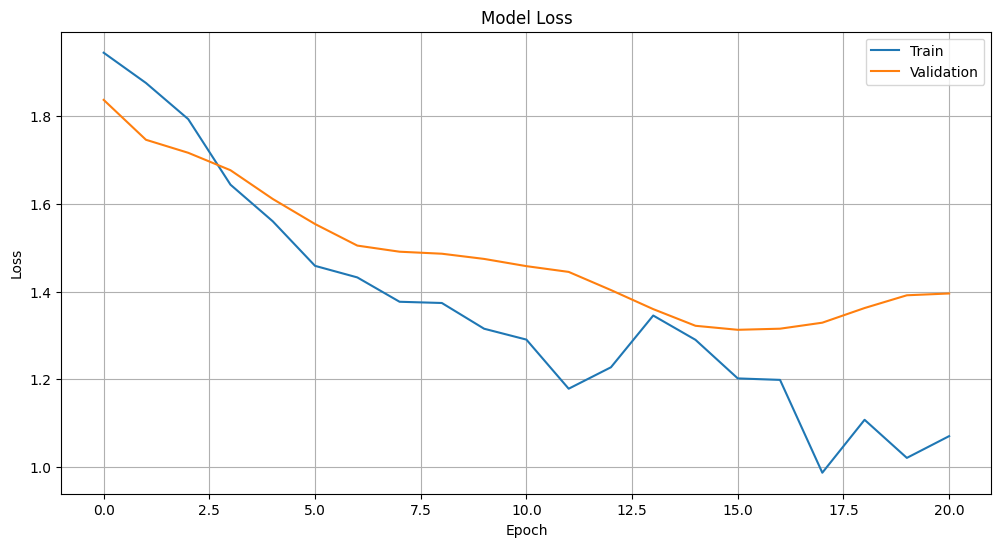

In [86]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


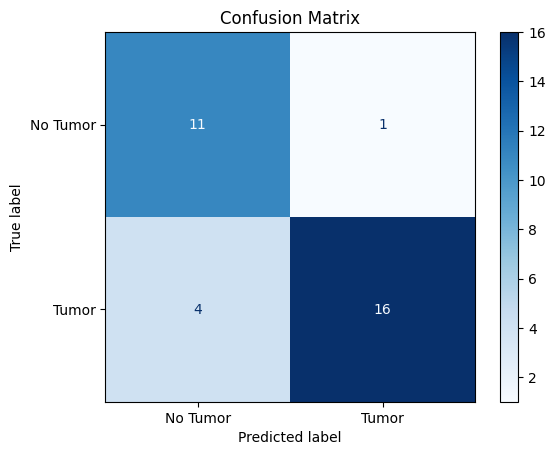

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# **MobileNetV2 Optimized**

In [88]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# Load MobileNetV2 model with pre-trained weights, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


/tmp/ipykernel_35/3382360366.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.5312 - loss: 2.2795 - val_accuracy: 0.4062 - val_loss: 2.0404
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5312 - loss: 2.2850 - val_accuracy: 0.4375 - val_loss: 2.1301
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6250 - loss: 1.9205 - val_accuracy: 0.5000 - val_loss: 1.9127
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6250 - loss: 1.9572 - val_accuracy: 0.7812 - val_loss: 1.6858
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5625 - loss: 1.7996 - val_accuracy: 0.7500 - val_loss: 1.5981
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.7188 - loss: 1.6875 - val_accuracy: 0.7500 - val_loss: 1.5842
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7500 - loss: 1.6202 - val_accuracy: 0.7500 - val_loss: 1.5470
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.7812 - loss: 1.6070 - val_accuracy: 0.7500 - val_loss: 1.5008


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


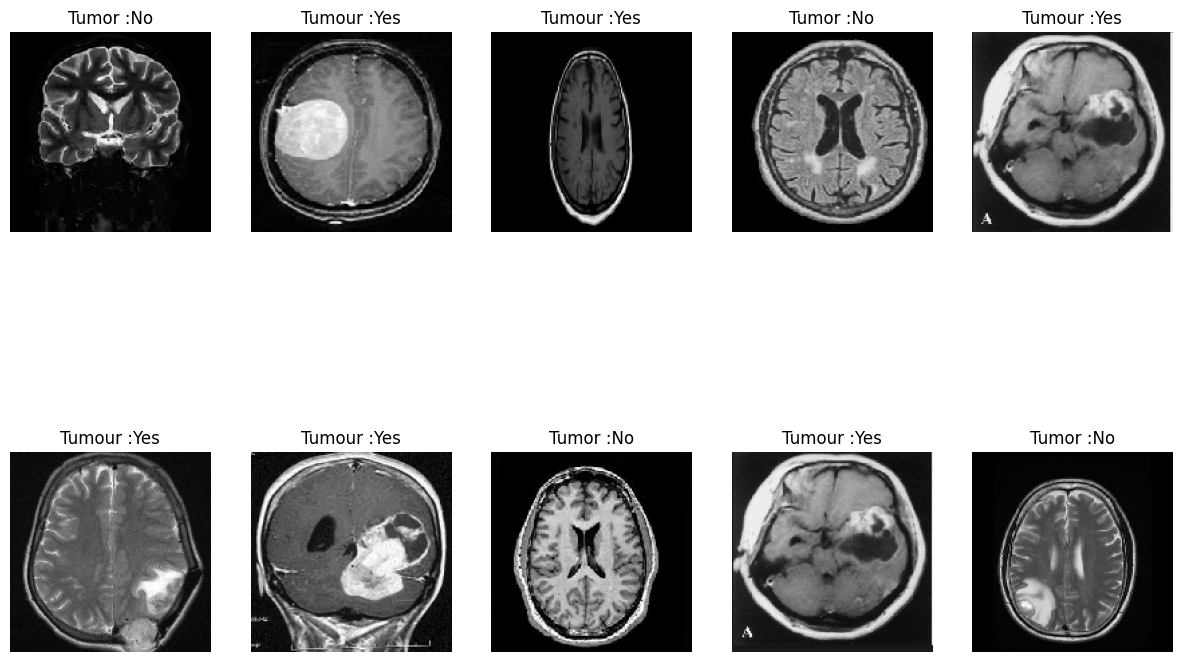

In [89]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
selected_indices = np.random.choice(len(X_test), 10, replace=False)

# Predict the selected images
predictions = model.predict(X_test[selected_indices])

# Plot the images with their predicted labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[selected_indices[i]])
    plt.title('Tumour :Yes' if predictions[i] > 0.5 else 'Tumor :No')
    plt.axis('off')

plt.show()


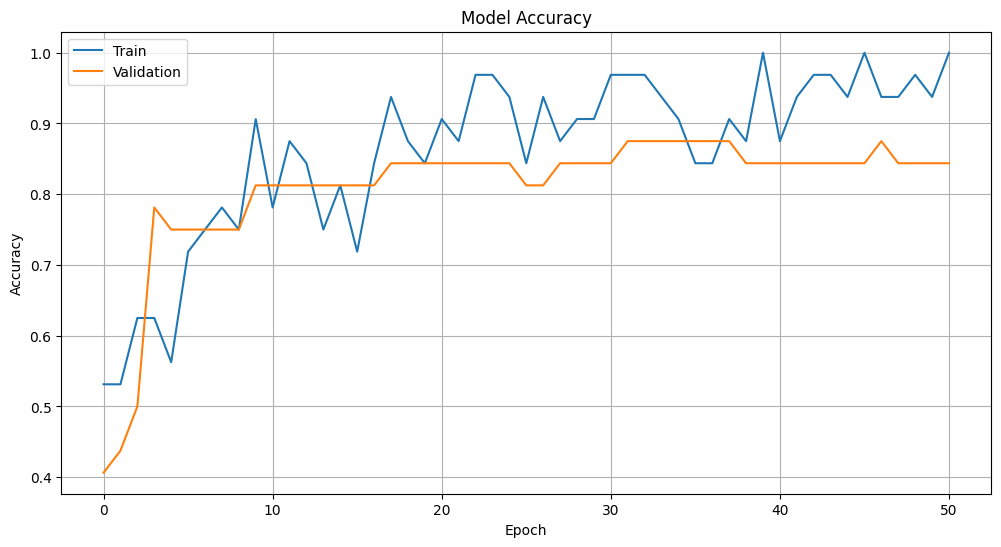

In [90]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


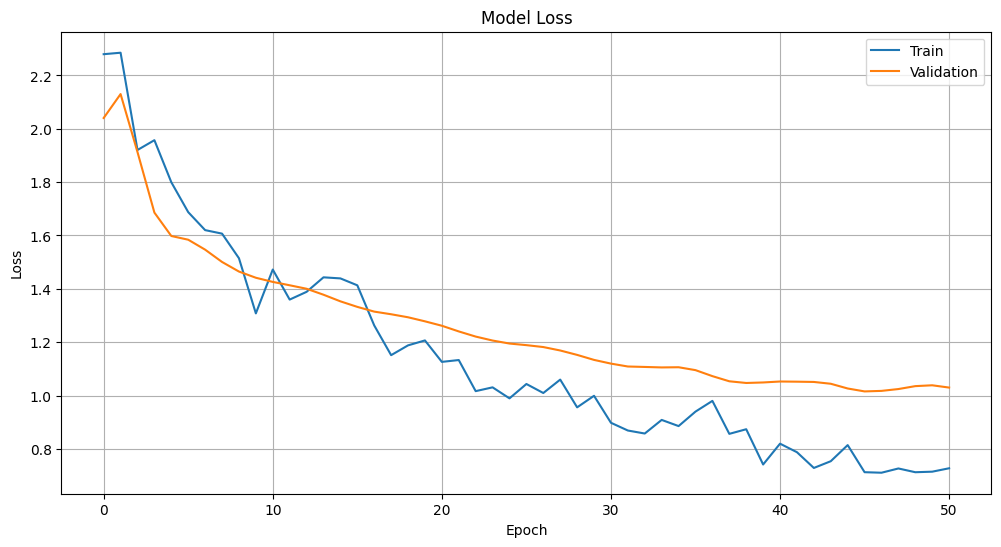

In [91]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


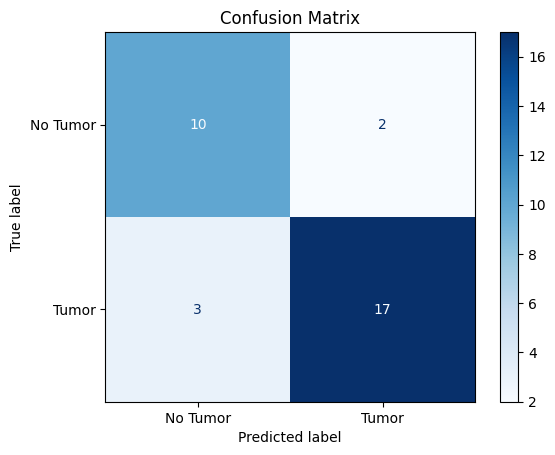

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Tumor', 'Tumor'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
